In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the network
networks = {
    "Caltech": "./data/Caltech36.gml",
    "MIT": "./data/MIT8.gml",
    "Johns Hopkins": "./data/Johns Hopkins55.gml",
}

Question 2: Social Network Analysis with the Facebook100 Dataset
 The smallest network (Caltech) has 762 nodes in the largest connected component
 (LCC), and the largest has more than 40000 nodes in the LCC.
 Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT
 (which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in
 the LCC).

(a) (1 point) For these three networks plot the degree distribution for each of the
 three networks that you downloaded. What are you able to conclude from these
 degree distributions?

In [24]:
def load_and_process_network(file_path):
    G = nx.read_gml(file_path)
    G = nx.Graph(G)
    LCC = max(nx.connected_components(G), key=len)
    return G.subgraph(LCC).copy()

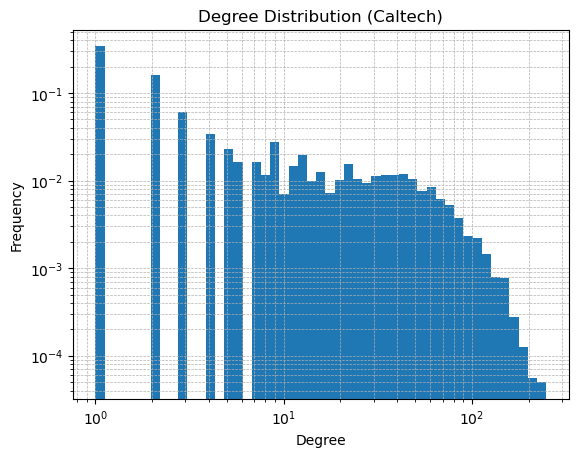

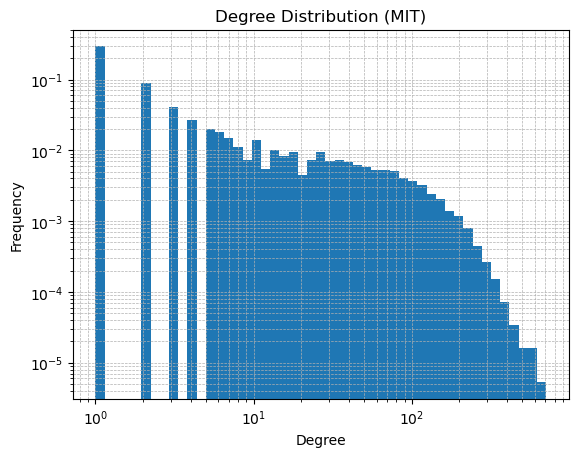

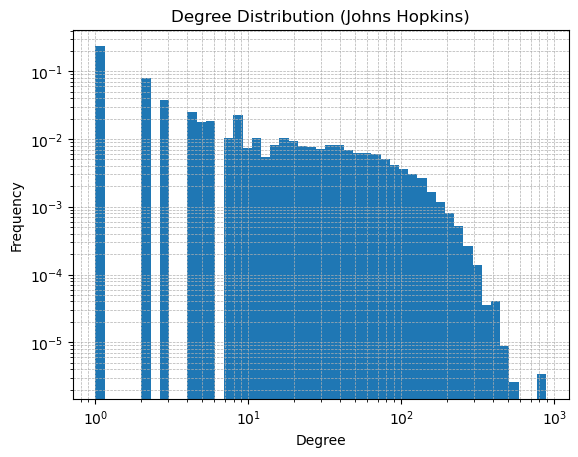

In [25]:
def plot_degree_distribution(G, title):
    degrees = sorted([deg for _, deg in G.degree()], reverse=True)
    plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees)), 50), density=True)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Save the plot as a PNG file in /images 
    plt.savefig(f'./images/{title}.png')
    
    plt.show()


for name, path in networks.items():
    G = load_and_process_network(path)
    plot_degree_distribution(G, f'Degree Distribution ({name})')

(b) (1 point) Compute the global clustering coe cient and mean local clustering
 coe cient for each of the 3 networks. In addition compute the edge density of
 each network. Should either of these networks be construed as sparse? Based on
 the density information and the clustering information what can you said about
 the graph topology?

In [ ]:
def compute_metrics(G):
    # Clustering coefficients
    global_clustering = nx.transitivity(G)  # Global clustering coefficient
    mean_local_clustering = nx.average_clustering(G)  # Mean local clustering coefficient
    
    # Edge density
    edge_density = nx.density(G)
    
    return global_clustering, mean_local_clustering, edge_density

for name, path in networks.items():
    G = load_and_process_network(path) 
    global_clustering, mean_local_clustering, edge_density = compute_metrics(G)
    print(f"Metrics for {name}:")
    print(f"  Global Clustering Coefficient: {global_clustering:.4f}")
    print(f"  Mean Local Clustering Coefficient: {mean_local_clustering:.4f}")
    print(f"  Edge Density: {edge_density:.4f}\n")


Metrics for Caltech:
  Global Clustering Coefficient: 0.2913
  Mean Local Clustering Coefficient: 0.4091
  Edge Density: 0.0574

Metrics for MIT:
  Global Clustering Coefficient: 0.1803
  Mean Local Clustering Coefficient: 0.2724
  Edge Density: 0.0123

Metrics for Johns Hopkins:
  Global Clustering Coefficient: 0.1932
  Mean Local Clustering Coefficient: 0.2690
  Edge Density: 0.0140



(c) (1 point) For each network, also draw a scatter plot of the degree versus local
 clustering coe cient. Based on these calculations as well as your previous ones,
 are you able to draw any conclusions about any similarities or di erences between
 the tree networks? What other observations can you make?

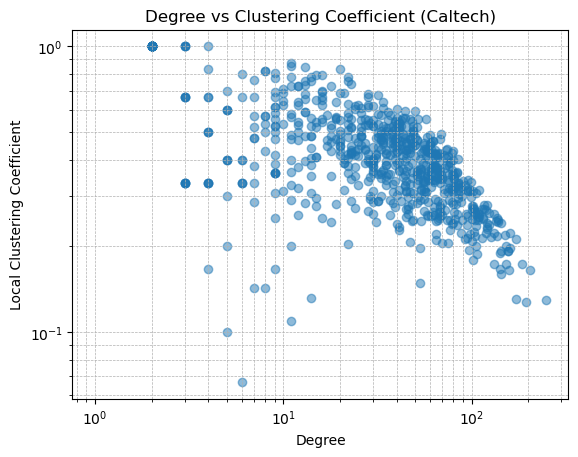

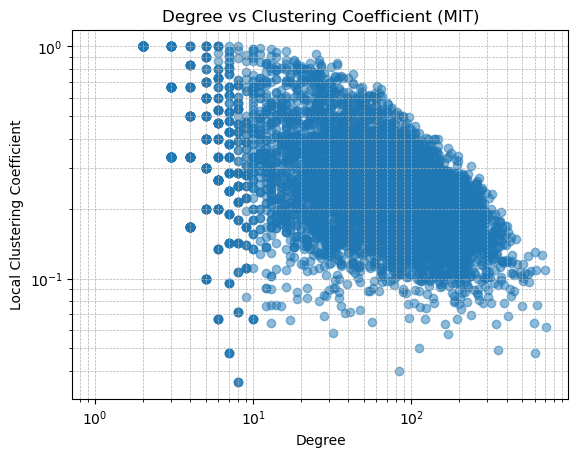

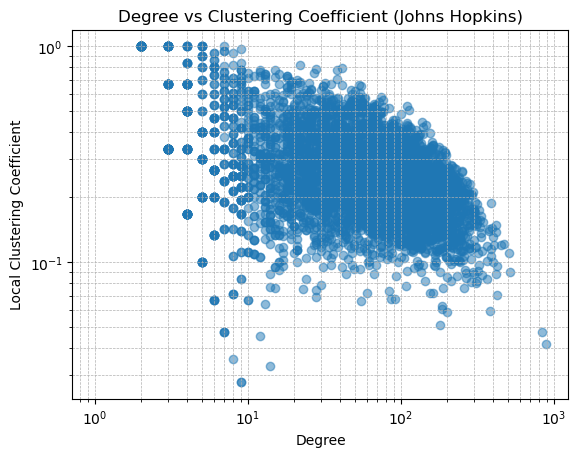

In [28]:
def plot_degree_vs_clustering(G, name):
    degrees = dict(G.degree())
    clustering_coeffs = nx.clustering(G)
    
    x = list(degrees.values())
    y = list(clustering_coeffs.values())
    
    plt.scatter(x, y, alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Local Clustering Coefficient')
    plt.title(f'Degree vs Clustering Coefficient ({name})')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Save the plot as a PNG file in /images 
    plt.savefig(f'./images/{name}_degree_vs_clustering.png')
    
    plt.show()

for name, path in networks.items():
    G = load_and_process_network(path)
    plot_degree_vs_clustering(G, name)